**Índice**<a id='toc0_'></a>    
- [Material de apoio](#toc1_1_1_)    
- [Distribuição Normal e Intervalo de Confiança](#toc2_)    
  - [Exemplo](#toc2_1_)    
- [Porque a distribuição normal é tão importante para estatística?](#toc3_)    
  - [Distribuição Normal](#toc3_1_)    
  - [Como podemos usar isso de forma mais ampla](#toc3_2_)    
- [Construindo Intervalos de Confiança](#toc4_)    
  - [Possíveis problemas](#toc4_1_)    
  - [Interpreteção](#toc4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Material de apoio](#toc0_)

Leitura sugerida
1. Statistical Thinking for the 21st Century. Poldrack. Capítulo 7.
Disponível em: https://statsthinking21.github.io/statsthinking21-core-site/sampling.html
2. An Introduction to Empirical Legal Research. Epstein & Martin. Capítulo 7, item 7.2. Pp. 149-154

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <a id='toc2_'></a>[Distribuição Normal e Intervalo de Confiança](#toc0_)

Nas últimas aulas aprendemos como averiguar e testar a relação entre variáveis. Nossa principal preocupação era de entender a relação entre 2 variáveis. Utilizando o **teste de Pearson** podemos testar *se há uma relação linear entre as 2 variáveis no nosso conjunto de dados*. Além disso, utilizando **regressões** podemos não apenas checar se há correlação entre as variáveis, mas também *estimar o tamanho do efeito da correlação*. Utilizando essa ferramenta somos capazes de estimar o valor de uma variável a partir de outras que achamos estar correlacionadas.

Essas ferramentas nos ajudam a entender como características variam em conjunto e também podem auxiliar a estimar novos valores a partir das variáveis correlacionadas. Porém, podemos ter um outro objetivo para nossas amostras de dados.

Supomos que queremos a partir de uma amostra da população geral estimar o valor dessa variável para a população completa. As ferrametas que vimos até agora não nos auxiliam nessa tarefa. Esse tipo de problema aparece quando realizamos pesquisas eleitorais, estimar a parcela da população que apresenta certa condição de saúde, ou a vida útil de certo aparelho.

Nesses casos queremos a partir dos valores observados fazer inferências sobre o universo da população. O caso mais comum dessa tarefa é estimar a média da variável que estamos estudando na população geral.

Para resolver esse tipo de problema fazemos estimativas usando **Intervalo de Confiança**, que nos permite chegar a dois valores que usamos de limite para delimitar o **intervalo** onde a variável que estamos estimando se encontra com um certo **nível de confiança**.

## <a id='toc2_1_'></a>[Exemplo](#toc0_)

Queremos estimar a porcentagem da população que utiliza cinto de segurança ao dirigir. Para realizar nossa pesquisa amostramos de forma aleatória uma parcela da população de 352 pessoas e pedimos que elas respondessem Sim ou Não para a pergunta da nossa pesquisa.

Podemos carregar os dados de nosso exemplo

In [2]:
df_transito = pd.read_csv("http://bit.ly/3XU5lKF")

df_transito.head()

,participante,resposta
0,0,Sim
1,1,Sim
2,2,Não
3,3,Sim
4,4,Sim


Como podemos começar a responder essa pergunta?

Para facilitar nossa intereção com termos matemáticos vamos estabelecer as convenções:

* $\sigma$ se refere ao Desvio Padrão
* $\mu$ se refere a Média da distribuição

# <a id='toc3_'></a>[Porque a distribuição normal é tão importante para estatística?](#toc0_)

Ao longo das últimas aulas mencionamos muitas vezes a distribuição normal, inclusive falando que essa distribuição era especialmente importante para a estatística e para as ferramentas que iríamos aprender. Agora iremos motivar um pouco esse ponto, e aprender porque essa distribuição é tão útil e como podemos utilizar suas propriedades para lidar com incertezas.

Um dos principais usos da distribuição normal é o fato de podermos aproximar variáveis que criamos a partir de processos **aleatórios** com ela. Isso significa que, caso as pressuposições estejam presentes, podemos calcular a chance de certos eventos acontecerem a partir da chance de sortearmos um número equivalente da distribuição normal. Isso é uma consequência do chamado *Teorema Central do Limite*.

A consequência prática importante é que: se **normalizarmos** apropriadamente a média de um número **suficientemente grande** de variáveis amostradas de forma aleatória e independente o resultado desse valor pertence a uma distribuição normal. Veremos isso nos próximos tópicos.

Para verificar o Teorema ocorrendo na prática podemos voltar ao exemplo do arremesso de dados das últimas aulas.

A distribuição normal tem o seguinte formato:


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1920px-Standard_deviation_diagram.svg.png style = "width:40%">
<br>
<center> <i> Fonte: Wikipedia. Normal_distribution. Retrieved 04 May 2021 from https://en.wikipedia.org/wiki/Normal_distribution </i> </center>


Vamos usar um arremesso honesto de dados, de forma que o valor de cada dado é 100% aleatório, e recebemos de volta já o valor da soma dos dados arremessados.

Vamos ver a distribuição dos valores que encontramos para diferentes números de arremessos honestos

In [5]:
from random import randint


def plot_arremessos(arremessos):
    p = sns.histplot(arremessos, kde=False, discrete=True)
    
    p.set(xlim=[0,np.max(arremessos)+2])


def arremesso_honesto(n=2):
    from random import randint
    #cria nossos dados que podem ter, cada um, um resultado que varia entre 1 e 6
    soma_dados = 0
    for x in range(n):
        soma_dados += randint(1, 6)
    return soma_dados

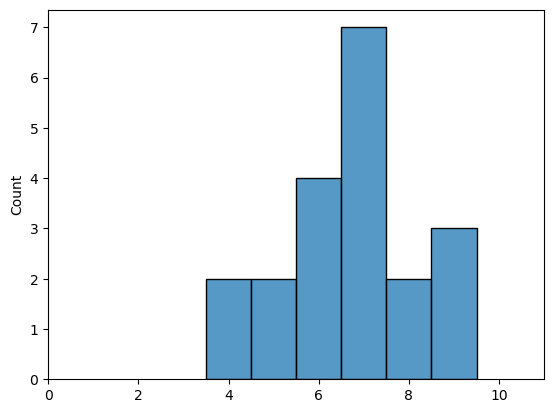

In [6]:
vinte_arremessos = [arremesso_honesto() for x in range(20)]

plot_arremessos(vinte_arremessos)


Se executarmos a célula acima várias vezes veremos que valores no meio tendem a ocorrer com maior frequência que nas pontas, assim como a imagem da distribuição normal! Contudo, muitas vezes vamos nos deparar com distribuições estranhas e concentradas nas pontas, ou que muitos dos valores possíveis não ocorrem nunca.

Vejamos o que acontece a medida que aumentamos o número de arremessos. Vale executar cada célula várias vezs para ver como ela varia

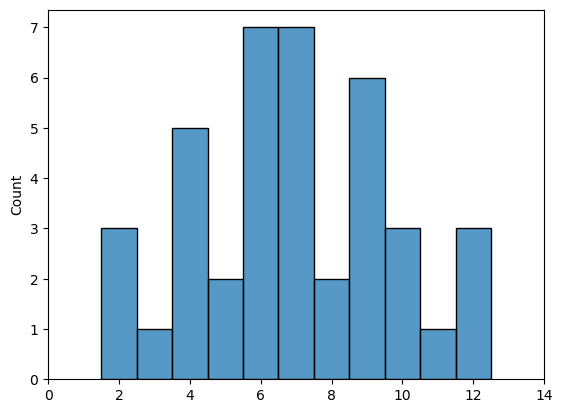

In [7]:
#40 arremessos
plot_arremessos([arremesso_honesto() for x in range(40)])

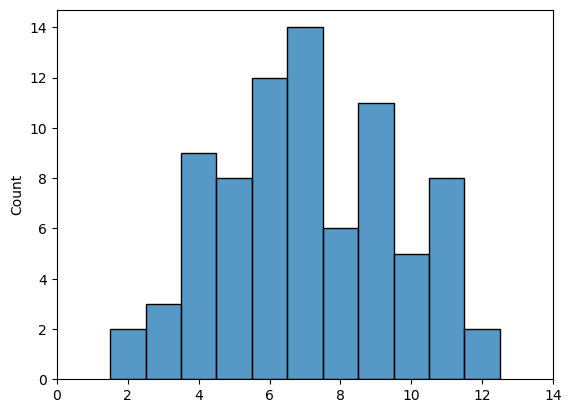

In [8]:
#80 arremessos
plot_arremessos([arremesso_honesto() for x in range(80)])

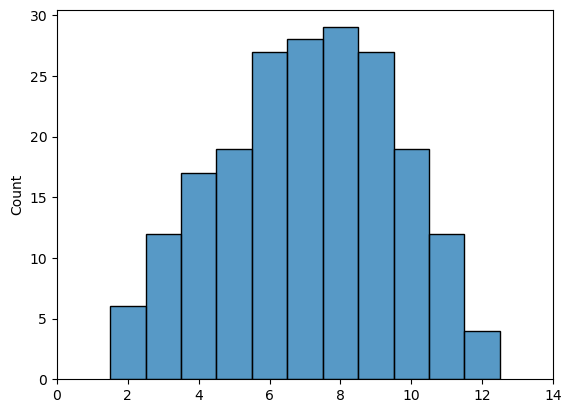

In [9]:
# 200 arremessos!
plot_arremessos([arremesso_honesto() for x in range(200)])

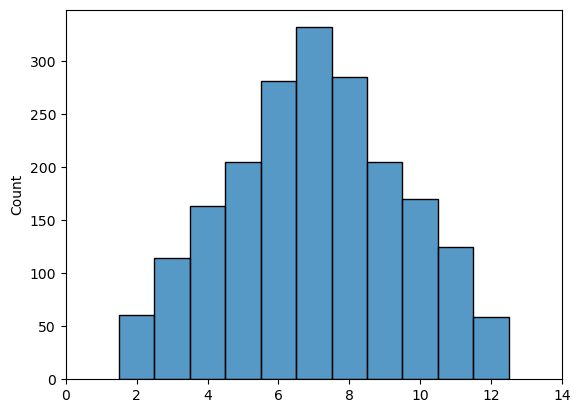

In [10]:
# 2000 arremessos!
plot_arremessos([arremesso_honesto() for x in range(2000)])

20.000 arremessos!

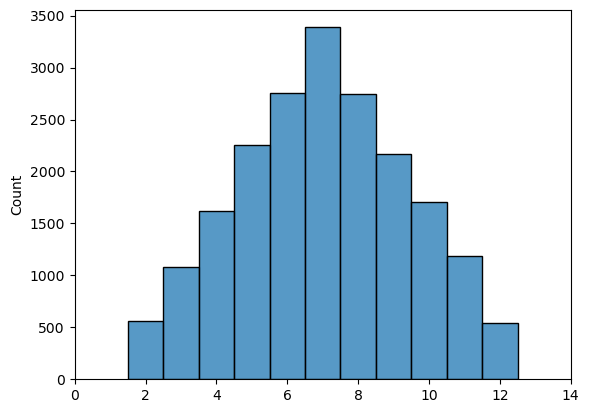

In [11]:
plot_arremessos([arremesso_honesto() for x in range(20000)])

Nessa demonstração estávamos somando apenas 2 varíaveis (cada um dos dados arremessados) e nos aproximamos da distribuição normal aumentando o número de observações.

O que acontece se aumentarmos o número de dados e utilizarmos a **Média** do valor dos dados? Isso continua acontecendo? O quão comum são os casos extremos?

Teste isso nas células abaixo!

**Dica: A função arremesso honesto possui um argumento n que se refere ao número de dados. Use a função abaixo para testar!**

Vale a pena ajustar o número de bins para ajustar o gráfico.

In [12]:
def plot_media_arremessos(media_arremessos, bins='auto'):
    p = sns.histplot(media_arremessos, kde=False, bins=bins)
    p.set(xlim=[1,6])

In [13]:
n_arremessos = 2

arremesso_honesto()

12

Podemos ver que conforme aumentamos o número de arremessos nossos histograma fica mais parecido, e tende a variar menos quando executamos várias vezes, com a curva da distribuição normal.

Aumentando o número de vezes que lançamos os dados fomos capazes de ver o que chamamos de *convergência dos dados para a Distribuição Normal*. Isso é uma consequência direta de estarmos aumentando nosso N, ou número de observações

Assim, para o que estamos estudando podemos entender que a medida que nosso N fica maior podemos fazer aproximações cada vez mais precisas, mesmo sem conhecer precisamente a distribuição original.

Veremos agora algumas propriedades da distribuição normal.


## <a id='toc3_1_'></a>[Distribuição Normal](#toc0_)

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1920px-Standard_deviation_diagram.svg.png style = "width:40%">

<span style="color:red"> *A imagem acima mostra novamente o gráfico de distribuição normal.* 
    
Olhando para a figura novamente, podemos ver algumas características da Distribuição normal.

Em primeiro lugar, vale destacar que devido a característica da distribuição normal ser perfeitamente simétrica e ter seu ponto máximo no meio, os valores da Média, Moda e Mediana são o mesmo e se encontram no centro da distribuição. Na figura acima exatamente no valor 0.

Outro ponto importante é que quando essa distribuição tem **Média 0 e Desvio Padrão 1 chamamos a distribuição de Normal Padrão** (Standard Normal). Essa é a forma que esse tipo de distribuição costuma ser mostrado em imagens e gráficos.

Além disso, as porcentagens apresentadas representam a chance de sortearmos um valor da distribuição naquele intervalo. Alguns intervalores utéis, com a média no centro:

* 68.2% dos valores estão a distância de 1 Desvio Padrão da média.
* **95%** dos valores estão entre 1.96 Desvios Padrões abaixo e acima da média.
* 95.4% estão a distância de até 2 Desvios Padrões
* 99% estão a distância de até 2.576 Desvios Padrões
* **99.5%** estão a distãncia de até 2.807 Desvios Padrões
* 99.9% estão a distância de até 3.291 Desvios Padrões

## <a id='toc3_2_'></a>[Como podemos usar isso de forma mais ampla](#toc0_)

Podemos nos perguntar como isso pode ser tão útil, afinal, muitas vezes queremos ver coisas que não são quantificáveis diretamente em números, e a média pode não fazer tanto sentido. Afinal, nosso exemplo inicial era de uma pesquisa onde nossas respostas eram Sim ou Não.

Podemos modelar nossos dados em volta desse tipo de fenômeno considerando que se observarmos o fenômeno desejado, atribuíremos a observação o valor 1, caso contrário atribuíremos o valor 0. Nesse caso a média dos dados serão a parcela de observações que foram marcadas como 1.

Certas propriedades matemáticas desse tipo de dados permitem que as aproximações sejam dessa forma tenham as propriedades que mostramos acima.


Voltando ao nosso exemplo inical podemos atribuir o valor 1 para os respondentes que apresentam a característica pesquisada, ou seja, utilizam cinto de segurança e 0 para os que responderam não.

Vamos criar uma coluna que transforma as respostas Negativas e Positivas em número.



In [14]:
valores = list()
for v in df_transito['resposta']:
    if v == 'Sim':
        valores.append(1)
    else:
        valores.append(0)
        
df_transito['resposta_binario'] = valores

df_transito.head()

,participante,resposta,resposta_binario
0,0,Sim,1
1,1,Sim,1
2,2,Não,0
3,3,Sim,1
4,4,Sim,1


Vamos checar a média das respostas com nossa transformação, a proporção de cada resposta e o desvio padrão.

In [15]:
print("O valor médio das respostas foi:", df_transito['resposta_binario'].mean())

df_transito['resposta_binario'].value_counts(normalize=True)

O valor médio das respostas foi: 0.8323863636363636


1    0.832386
0    0.167614
Name: resposta_binario, dtype: float64

In [16]:
df_transito['resposta_binario'].std()

0.3740545363537187

Vamos ver a seguir que outro fator importante é saber o número de respostas, vamos recuperar essa informação do DataFrame

In [17]:
df_transito.shape[0]

352

O que estamos aprendendo nos diz que podemos fazer inferências a partir do valor da média encontrado. Mas como podemos fazer isso?

# <a id='toc4_'></a>[Construindo Intervalos de Confiança](#toc0_)

Intervalos de confiança tem 2 elementos importantes:

1. Nível de confiança. Normalmente definido como: $\gamma$
2. Margem de erro: Valor que pode ser adicionado ou subtraído do valor encontrado e estabelecem os valores máximos e mínimos do intervalo.

Esses 2 fatores estão diretamente relacionado, e se estabelecemos um deles podemos calcular o outro.

Podemos relacioná-los com a distribuição normal que vimos anteriormente

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1920px-Standard_deviation_diagram.svg.png style = "width:40%">

<span style="color:red"> *A imagem acima mostra outra vez o gráfico de distribuição normal.*

Se considerarmos que a Média que encontramos é o centro da distribuição, nosso Nível de Confiança é equivalente a chance que temos de obter o valor até determinada distância da média. Já a margem de erro está diretamente relacionada ao desvio padrão, o qual usamos para estabelecer a distância.

Em outras palavras, se construirmos um intervalo com Margem de Erro de 1 desvio padrão ($\sigma$) da média, este intervalo teria Nível de Confiança de 0.682 (68,2%), que são os valores abrangidos nessa distância.

Fazendo o caminho contrário, se estabelecermos uma margem de erro de 2 $\sigma$ teremos um Nível de Confiança do intervalo de 95.4%.

Retornando aos valores que listamos acima, e usando valores mais comuns:

* Um intervalo de confiança de 95% contém valores até 1.96 * $\sigma$ da média
* Um intervalo de 99.5% contém os valores até 2.807 * $\sigma$ da média

Utilizamos a letra $c$ para denominar esse número de intervalos de confiança que delimita nosso intervalo

Com esse conhecimento estamos prontos para construir nosso intervalo de confiança!

Vamos estabeler algumas últimas convenções:

$N$ se refere ao tamanho da nossa amostra (número de observações)

$\bar{X}_n $ equivale ao valor média da amostra observada

$\mu$ se refere ao valor que estamos estimando (média real)

Podemos estabelecer a fórmula para construir nosso intervalo de confiança de 2 modos diferentes:

$\Pr\left(\bar{X}_n - \frac{c\sigma}{\sqrt{n}} \le \mu \le \bar{X}_n + \frac{c\sigma}{\sqrt{n}} \right)=\gamma$

A margem de erro é representada pelo termo: $\frac{c \sigma}{\sqrt{n}}$

Ou:

$\Pr\left(\mu \le \bar{X}_n + \frac{c\sigma}{\sqrt{n}} \right)= \frac{(1 - \gamma)}{2}$


O limite interior do nosso intervalo é representado por:

$\bar{X}_n - \frac{c\sigma}{\sqrt{n}}$

E o limite superior por:

$\bar{X}_n + \frac{c\sigma}{\sqrt{n}}$

Vamos resolver o exemplo a partir de cada variável do intervalo para entendermos um pouco melhor

Vamos calcular as estatísticas que precisamos!

Vamos definir um intervalo de 95% de confiança para nossa estimativa.

Como mencionado acima utilizaremos um C de 1.96 desvios padrões

In [19]:
c = 1.96

margem_erro = (c*desvpad_transito)/np.sqrt(n)

limite_inferior = media_transito - margem_erro

limite_superior = media_transito + margem_erro

print(f"Nosso intervalo de 95% de Confiança para motoristas que usam cinto de segurança é:\n({round(100*limite_inferior,2)}%, {round(100*limite_superior,2)}%)")

Nosso intervalo de 95% de Confiança para motoristas que usam cinto de segurança é:
(79.33%, 87.15%)


Calculando o C utilizando python

In [20]:
import scipy.stats

confianca = 0.95 #95%
scipy.stats.norm.interval(confianca)

(-1.959963984540054, 1.959963984540054)

## <a id='toc4_1_'></a>[Possíveis problemas](#toc0_)

* As amostras usadas são geradas realmente de forma aleatória?

* E se estamos retirando pessoas com características diferentes, nossa média pode ser diferente para grupos diferentes?

## <a id='toc4_2_'></a>[Interpreteção](#toc0_)

Um problema comum com o uso de intervalos de confiança é sua interpretação. Era comum ouvirmos em referências a pesquisas eleitorais a interpretação de que o *valor do Nível de Confiança seria a chance do intervalo conter o valor real*.

Essa interpretação está incorreta.

A forma correta de interpretarmos o intervalo de confiança é que *se realizarmos todo esse processo um grande número de vezes (desde a amostragem), o valor de $\gamma$ será a proporção dos intervalos que contém o verdadeiro valor do que estamos tentando estimar*.



# Desafio

